In [1]:
# Get Data
!pip install vaderSentiment

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import matplotlib.dates as mdates
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.porter import *
! pip install wordcloud
from wordcloud import WordCloud

data = pd.read_csv('eileenGuTweets30k.csv')

data.head()



,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location
0,0,Interaction,RT @NikkiHaley: When you choose to put the Ame...,DilmuraS,103,255,1,13968,"Ashburn, VA",NaN,Michael19621962,701753,720,2150,5778,NaN
1,1,Self,Winter Olympics 2022: $42 million truth in Eil...,PaulDocWatson,675,1327,16,17026,"Peoria, IL",NaN,PaulDocWatson,701753,720,2150,5778,NaN
2,2,Interaction,RT @MaitreyaBhakal: If a woman on social media...,AceiTaka,154,547,1,15075,NaN,NaN,PaulDocWatson,23143,1003,140,12614,India
3,3,Interaction,RT @bigbuddha50: US-born Olympian Nathan Chen ...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,2,3,0,1386,NaN
4,4,Interaction,RT @BrandAdalia: Make her stay in China. TRAIT...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,14925,12004,45,28473,"Florida, USA🇺🇸"


In [2]:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt

In [3]:
# Remove emoticons from column 'Author'
data['A_username'] = data['A_username'].str.replace("[^\w()'+]", " ")
data['B_username'] = data['B_username'].str.replace("[^\w()'+]", " ")
data

/var/folders/h3/gdkjgm794gbfyrxhf5g4zkqc0000gn/T/ipykernel_31689/167577286.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['A_username'] = data['A_username'].str.replace("[^\w()'+]", " ")
/var/folders/h3/gdkjgm794gbfyrxhf5g4zkqc0000gn/T/ipykernel_31689/167577286.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['B_username'] = data['B_username'].str.replace("[^\w()'+]", " ")


,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location
0,0,Interaction,RT @NikkiHaley: When you choose to put the Ame...,DilmuraS,103,255,1,13968,"Ashburn, VA",NaN,Michael19621962,701753,720,2150,5778,NaN
1,1,Self,Winter Olympics 2022: $42 million truth in Eil...,PaulDocWatson,675,1327,16,17026,"Peoria, IL",NaN,PaulDocWatson,701753,720,2150,5778,NaN
2,2,Interaction,RT @MaitreyaBhakal: If a woman on social media...,AceiTaka,154,547,1,15075,NaN,NaN,PaulDocWatson,23143,1003,140,12614,India
3,3,Interaction,RT @bigbuddha50: US-born Olympian Nathan Chen ...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,2,3,0,1386,NaN
4,4,Interaction,RT @BrandAdalia: Make her stay in China. TRAIT...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,14925,12004,45,28473,"Florida, USA🇺🇸"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29983,29983,Interaction,RT @Kevin_W_Kind: The Eileen Gu story has rais...,Zazzzzzz4,54,639,1,14096,NaN,NaN,world_news_ja,1109,398,8,655,NaN
29984,29984,Interaction,RT @jakpost: Eileen Gu and Beverly Zhu were bo...,GPerdikaris,5620,5968,243,307082,"Jakarta, W. Java, Indonesia",NaN,world_news_ja,959269,9,4105,266336,Jakarta
29985,29985,Interaction,RT @Beijing2022: 08 Feb -Day 4️⃣\n#FreestyleSk...,ChnMission,1504,109,50,1648,Geneva,NaN,world_news_ja,371244,1058,1423,4482,Beijing
29986,29986,Interaction,RT @hermit_hwarang: *Ongoing union wave*\n*2 y...,morbid_elation,2313,680,154,414157,Stolen Bodéwadmiakiwen land,NaN,world_news_ja,37371,1114,180,85372,In my head - Lenapehoking


In [4]:
data['Tidy_Content'] = np.vectorize(remove_pattern)(data['Tweet'], "@[\w]*")
data.head()

,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location,Tidy_Content
0,0,Interaction,RT @NikkiHaley: When you choose to put the Ame...,DilmuraS,103,255,1,13968,"Ashburn, VA",NaN,Michael19621962,701753,720,2150,5778,NaN,RT : When you choose to put the American flag ...
1,1,Self,Winter Olympics 2022: $42 million truth in Eil...,PaulDocWatson,675,1327,16,17026,"Peoria, IL",NaN,PaulDocWatson,701753,720,2150,5778,NaN,Winter Olympics 2022: $42 million truth in Eil...
2,2,Interaction,RT @MaitreyaBhakal: If a woman on social media...,AceiTaka,154,547,1,15075,NaN,NaN,PaulDocWatson,23143,1003,140,12614,India,RT : If a woman on social media received as mu...
3,3,Interaction,RT @bigbuddha50: US-born Olympian Nathan Chen ...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,2,3,0,1386,NaN,RT : US-born Olympian Nathan Chen called a 'tr...
4,4,Interaction,RT @BrandAdalia: Make her stay in China. TRAIT...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,14925,12004,45,28473,"Florida, USA🇺🇸",RT : Make her stay in China. TRAITOR!\n\nBorn ...


In [5]:
data['Tidy_Content'] = data['Tidy_Content'].str.replace("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ")
data.head()

/var/folders/h3/gdkjgm794gbfyrxhf5g4zkqc0000gn/T/ipykernel_31689/3976099435.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Tidy_Content'] = data['Tidy_Content'].str.replace("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ")


,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location,Tidy_Content
0,0,Interaction,RT @NikkiHaley: When you choose to put the Ame...,DilmuraS,103,255,1,13968,"Ashburn, VA",NaN,Michael19621962,701753,720,2150,5778,NaN,RT : When you choose to put the American flag ...
1,1,Self,Winter Olympics 2022: $42 million truth in Eil...,PaulDocWatson,675,1327,16,17026,"Peoria, IL",NaN,PaulDocWatson,701753,720,2150,5778,NaN,Winter Olympics 2022: $42 million truth in Eil...
2,2,Interaction,RT @MaitreyaBhakal: If a woman on social media...,AceiTaka,154,547,1,15075,NaN,NaN,PaulDocWatson,23143,1003,140,12614,India,RT : If a woman on social media received as mu...
3,3,Interaction,RT @bigbuddha50: US-born Olympian Nathan Chen ...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,2,3,0,1386,NaN,RT : US-born Olympian Nathan Chen called a 'tr...
4,4,Interaction,RT @BrandAdalia: Make her stay in China. TRAIT...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,14925,12004,45,28473,"Florida, USA🇺🇸",RT : Make her stay in China. TRAITOR!\n\nBorn ...


In [6]:
data['Tidy_Content'] = data['Tidy_Content'].str.replace("[^a-zA-Z#!]", " ")
data.head()

/var/folders/h3/gdkjgm794gbfyrxhf5g4zkqc0000gn/T/ipykernel_31689/1522428819.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Tidy_Content'] = data['Tidy_Content'].str.replace("[^a-zA-Z#!]", " ")


,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location,Tidy_Content
0,0,Interaction,RT @NikkiHaley: When you choose to put the Ame...,DilmuraS,103,255,1,13968,"Ashburn, VA",NaN,Michael19621962,701753,720,2150,5778,NaN,RT When you choose to put the American flag ...
1,1,Self,Winter Olympics 2022: $42 million truth in Eil...,PaulDocWatson,675,1327,16,17026,"Peoria, IL",NaN,PaulDocWatson,701753,720,2150,5778,NaN,Winter Olympics million truth in Eil...
2,2,Interaction,RT @MaitreyaBhakal: If a woman on social media...,AceiTaka,154,547,1,15075,NaN,NaN,PaulDocWatson,23143,1003,140,12614,India,RT If a woman on social media received as mu...
3,3,Interaction,RT @bigbuddha50: US-born Olympian Nathan Chen ...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,2,3,0,1386,NaN,RT US born Olympian Nathan Chen called a tr...
4,4,Interaction,RT @BrandAdalia: Make her stay in China. TRAIT...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,14925,12004,45,28473,"Florida, USA🇺🇸",RT Make her stay in China TRAITOR! Born an...


In [7]:
data['Tidy_Content'] = data['Tidy_Content'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
data.head()

,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location,Tidy_Content
0,0,Interaction,RT @NikkiHaley: When you choose to put the Ame...,DilmuraS,103,255,1,13968,"Ashburn, VA",NaN,Michael19621962,701753,720,2150,5778,NaN,When choose American flag standing freedom Whe...
1,1,Self,Winter Olympics 2022: $42 million truth in Eil...,PaulDocWatson,675,1327,16,17026,"Peoria, IL",NaN,PaulDocWatson,701753,720,2150,5778,NaN,Winter Olympics million truth Eileen furore
2,2,Interaction,RT @MaitreyaBhakal: If a woman on social media...,AceiTaka,154,547,1,15075,NaN,NaN,PaulDocWatson,23143,1003,140,12614,India,woman social media received much harassment Ei...
3,3,Interaction,RT @bigbuddha50: US-born Olympian Nathan Chen ...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,2,3,0,1386,NaN,born Olympian Nathan Chen called traitor Chine...
4,4,Interaction,RT @BrandAdalia: Make her stay in China. TRAIT...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,14925,12004,45,28473,"Florida, USA🇺🇸",Make stay China TRAITOR! Born raised America E...


In [8]:
tokenize_tweets = data['Tidy_Content'].apply(lambda x: x.split()) 
tokenize_tweets.head()

0    [When, choose, American, flag, standing, freed...
1    [Winter, Olympics, million, truth, Eileen, fur...
2    [woman, social, media, received, much, harassm...
3    [born, Olympian, Nathan, Chen, called, traitor...
4    [Make, stay, China, TRAITOR!, Born, raised, Am...
Name: Tidy_Content, dtype: object

In [9]:
stemmer = PorterStemmer()

tokenize_tweets = tokenize_tweets.apply(lambda x: [stemmer.stem(i) for i in x])
tokenize_tweets.head()



0    [when, choos, american, flag, stand, freedom, ...
1       [winter, olymp, million, truth, eileen, furor]
2    [woman, social, media, receiv, much, harass, e...
3    [born, olympian, nathan, chen, call, traitor, ...
4    [make, stay, china, traitor!, born, rais, amer...
Name: Tidy_Content, dtype: object

In [10]:
for i in range(len(tokenize_tweets)):
  tokenize_tweets[i] = ' '.join(tokenize_tweets[i])

data['Tidy_Content'] = tokenize_tweets
data.head()

,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,B_username,B_followers,B_following,B_listed,B_posts,B_location,Tidy_Content
0,0,Interaction,RT @NikkiHaley: When you choose to put the Ame...,DilmuraS,103,255,1,13968,"Ashburn, VA",NaN,Michael19621962,701753,720,2150,5778,NaN,when choos american flag stand freedom when ch...
1,1,Self,Winter Olympics 2022: $42 million truth in Eil...,PaulDocWatson,675,1327,16,17026,"Peoria, IL",NaN,PaulDocWatson,701753,720,2150,5778,NaN,winter olymp million truth eileen furor
2,2,Interaction,RT @MaitreyaBhakal: If a woman on social media...,AceiTaka,154,547,1,15075,NaN,NaN,PaulDocWatson,23143,1003,140,12614,India,woman social media receiv much harass eileen r...
3,3,Interaction,RT @bigbuddha50: US-born Olympian Nathan Chen ...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,2,3,0,1386,NaN,born olympian nathan chen call traitor chines ...
4,4,Interaction,RT @BrandAdalia: Make her stay in China. TRAIT...,Dennis64403986,11,102,1,1234,NaN,NaN,PaulDocWatson,14925,12004,45,28473,"Florida, USA🇺🇸",make stay china traitor! born rais america eil...


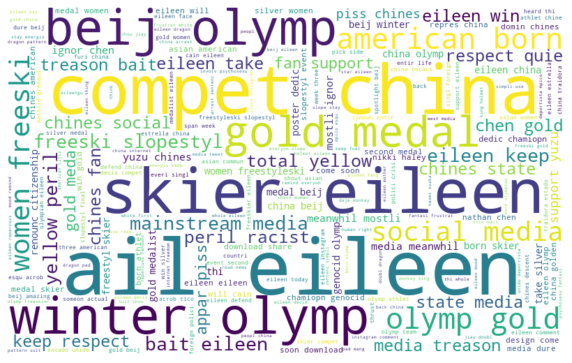

In [11]:
all_words = ' '.join([text for text in data['Tidy_Content']])

wordcloud = WordCloud(width=800, height=500, random_state=21, background_color='white',  max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
# Hashtags mentions

def hashtag_extract(x):
  hashtags = []
  
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
    
  return hashtags

# Extract hashtags

hashtags = hashtag_extract(data['Tidy_Content'])

# Unnesting list

hashtags = sum(hashtags, [])

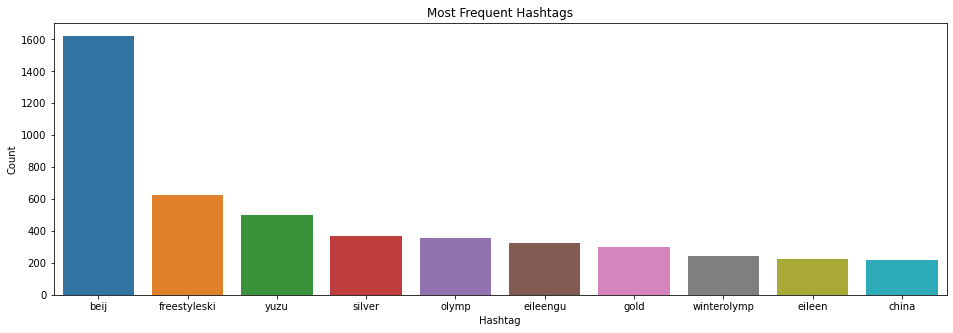

In [13]:
freq_dist = nltk.FreqDist(hashtags)

graph = pd.DataFrame({'Hashtag': list(freq_dist.keys()), 'Count': list(freq_dist.values())})

# Top 10 Most Frequent Hashtags

graph = graph.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
axis = sns.barplot(data=graph, x="Hashtag", y="Count")
axis.set(ylabel='Count')
plt.title('Most Frequent Hashtags')
plt.show()

In [14]:
analyser = SentimentIntensityAnalyzer()

scores = []
for sentence in data['Tidy_Content']:
  score = analyser.polarity_scores(sentence)
  scores.append(score)
  
scores = pd.DataFrame(scores)

data['Compound'] = scores['compound']
data['Negative'] = scores['neg']
data['Neutral'] = scores['neu']
data['Positive'] = scores['pos']
data.head()

,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,...,B_followers,B_following,B_listed,B_posts,B_location,Tidy_Content,Compound,Negative,Neutral,Positive
0,0,Interaction,RT @NikkiHaley: When you choose to put the Ame...,DilmuraS,103,255,1,13968,"Ashburn, VA",NaN,...,701753,720,2150,5778,NaN,when choos american flag stand freedom when ch...,0.6369,0.000,0.682,0.318
1,1,Self,Winter Olympics 2022: $42 million truth in Eil...,PaulDocWatson,675,1327,16,17026,"Peoria, IL",NaN,...,701753,720,2150,5778,NaN,winter olymp million truth eileen furor,0.3182,0.000,0.685,0.315
2,2,Interaction,RT @MaitreyaBhakal: If a woman on social media...,AceiTaka,154,547,1,15075,NaN,NaN,...,23143,1003,140,12614,India,woman social media receiv much harass eileen r...,-0.4939,0.211,0.789,0.000
3,3,Interaction,RT @bigbuddha50: US-born Olympian Nathan Chen ...,Dennis64403986,11,102,1,1234,NaN,NaN,...,2,3,0,1386,NaN,born olympian nathan chen call traitor chines ...,0.0000,0.000,1.000,0.000
4,4,Interaction,RT @BrandAdalia: Make her stay in China. TRAIT...,Dennis64403986,11,102,1,1234,NaN,NaN,...,14925,12004,45,28473,"Florida, USA🇺🇸",make stay china traitor! born rais america eil...,0.0000,0.000,1.000,0.000


In [15]:
def word_extract(x):
  words = []
  
  for i in x:
    ht = re.findall(r"(\w+)", i)
    words.append(ht)
    
  return words

# Extract words

words = word_extract(data['Tidy_Content'])

# words

# Unnesting list

words = sum(words, [])

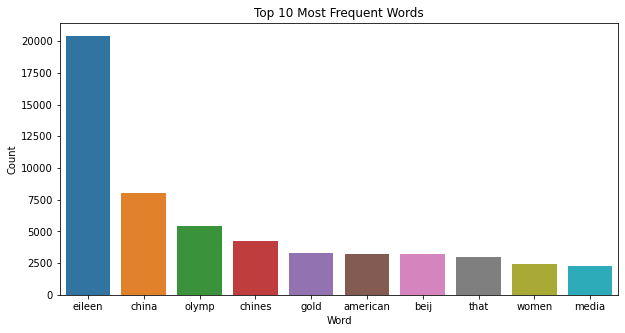

In [16]:
# Frequency Distribution

a = nltk.FreqDist(words)

b = pd.DataFrame({'Word': list(a.keys()), 'Count': list(a.values())})
length = len(b)

# Top 10 Most Frequent Words
b = b.nlargest(columns="Count", n = 10)
plt.figure(figsize=(10,5))
axis = sns.barplot(data=b, x='Word', y='Count')
axis.set(ylabel='Count')
plt.title('Top 10 Most Frequent Words')
plt.show()

In [17]:
# Set type of polarity
polarity = []

for i in range(len(data)):
  if (data['Compound'][i] < 0):
    polarity.append("Negative")
  elif (data['Compound'][i] > 0):
    polarity.append("Positive")
  else:
    polarity.append("Neutral")
    
polarity = pd.DataFrame(polarity)
data['Polarity'] = polarity
data.head()

,Unnamed: 0,Content Type,Tweet,A_username,A_followers,A_following,A_listed,A_posts,A_location,B_text,...,B_following,B_listed,B_posts,B_location,Tidy_Content,Compound,Negative,Neutral,Positive,Polarity
0,0,Interaction,RT @NikkiHaley: When you choose to put the Ame...,DilmuraS,103,255,1,13968,"Ashburn, VA",NaN,...,720,2150,5778,NaN,when choos american flag stand freedom when ch...,0.6369,0.000,0.682,0.318,Positive
1,1,Self,Winter Olympics 2022: $42 million truth in Eil...,PaulDocWatson,675,1327,16,17026,"Peoria, IL",NaN,...,720,2150,5778,NaN,winter olymp million truth eileen furor,0.3182,0.000,0.685,0.315,Positive
2,2,Interaction,RT @MaitreyaBhakal: If a woman on social media...,AceiTaka,154,547,1,15075,NaN,NaN,...,1003,140,12614,India,woman social media receiv much harass eileen r...,-0.4939,0.211,0.789,0.000,Negative
3,3,Interaction,RT @bigbuddha50: US-born Olympian Nathan Chen ...,Dennis64403986,11,102,1,1234,NaN,NaN,...,3,0,1386,NaN,born olympian nathan chen call traitor chines ...,0.0000,0.000,1.000,0.000,Neutral
4,4,Interaction,RT @BrandAdalia: Make her stay in China. TRAIT...,Dennis64403986,11,102,1,1234,NaN,NaN,...,12004,45,28473,"Florida, USA🇺🇸",make stay china traitor! born rais america eil...,0.0000,0.000,1.000,0.000,Neutral


In [18]:
data.to_csv('eileenGuSentiment30k.csv')